<a href="https://colab.research.google.com/github/Den9p/MO_2/blob/main/%D0%9A%D1%83%D0%B2%D1%88%D0%B0%D0%BD%D0%BE%D0%B2%2C_%D0%9F%D0%BE%D0%BB%D1%8F%D1%80%D1%83%D1%88%2C_%D0%A7%D0%B5%D0%BF%D0%B0%D0%BA_%D0%A2%D1%8E%D0%BC%D0%93%D0%A3_%D0%9C%D0%9E2_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки для работы

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from google.colab import files

Загружаем датасет

In [89]:
import kagglehub

# Загрузка последней версии датасета
path = kagglehub.dataset_download("ayushtankha/70k-job-applicants-data-human-resource")
print("Path to dataset files:", path)

# Определяем целевой путь
target_path = os.path.join(os.getcwd(), '1')

# Проверяем, существует ли целевой путь, если да - удаляем
if os.path.exists(target_path):
    shutil.rmtree(target_path)

# Перемещаем датасет в текущую рабочую директорию
shutil.move(path, target_path)
print(f"Dataset moved to: {target_path}")

100%|██████████| 2.02M/2.02M [00:00<00:00, 94.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushtankha/70k-job-applicants-data-human-resource/versions/1
Dataset moved to: /content/1


Загружаем данные

In [90]:
df = pd.read_csv('/content/1/stackoverflow_full.csv')

Посмотрим на данные

In [91]:
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Описание столбцов

From the survey results, we have built a dataset with the following columns:

- Age: age of the applicant, >35 years old or <35 years old (categorical)
- EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- MainBranch: whether the applicant is a profesional developer (categorical)
- YearsCode: how long the applicant has been coding (integer)
- YearsCodePro: how long the applicant has been coding in a professional context, (integer)
- PreviousSalary: the applicant's previous job salary (float)
- ComputerSkills: number of computer skills known by the applicant (integer)
- Employed: **target** variable, whether the applicant has been hired (categorical)

Посчитаем статистику для числовых столбцов

In [92]:
df.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


Посмотрим на типы данных в столбцах

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


Посмотрим на кол-во уникальных значений в каждой колонке

In [ ]:
df.nunique()

,0
Unnamed: 0,73462
Age,2
Accessibility,2
EdLevel,5
Employment,2
Gender,3
MentalHealth,2
MainBranch,2
YearsCode,51
YearsCodePro,51


Посмотрим на все уникальные значения графически и табличкой

Age
Age
<35    47819
>35    25643
Name: count, dtype: int64


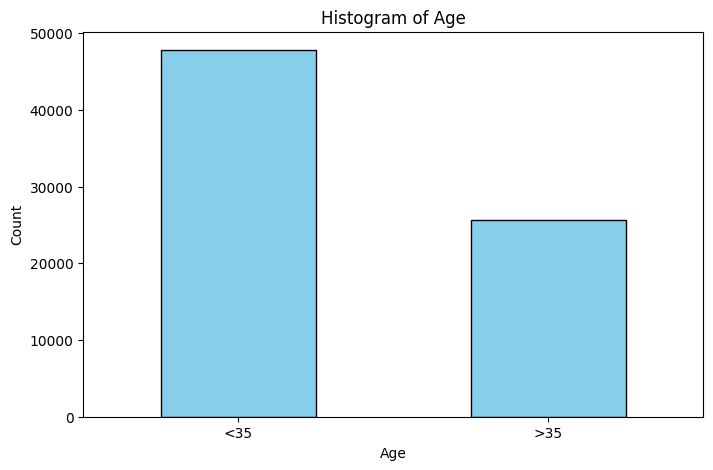

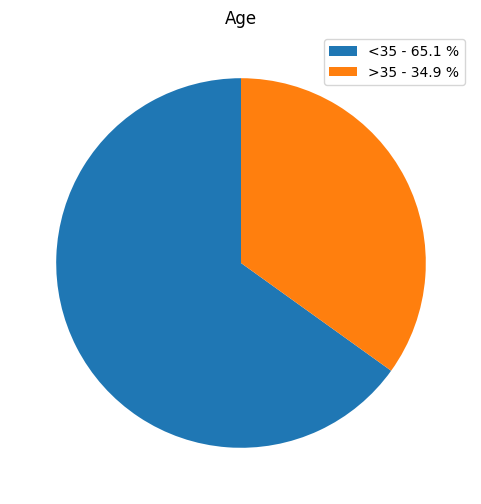

Accessibility
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64


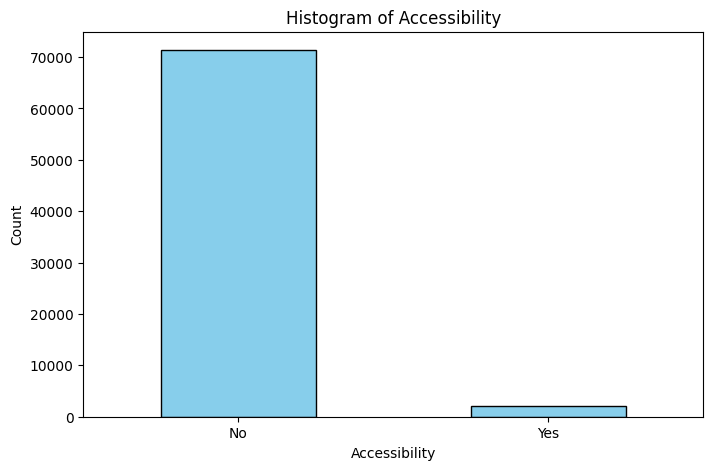

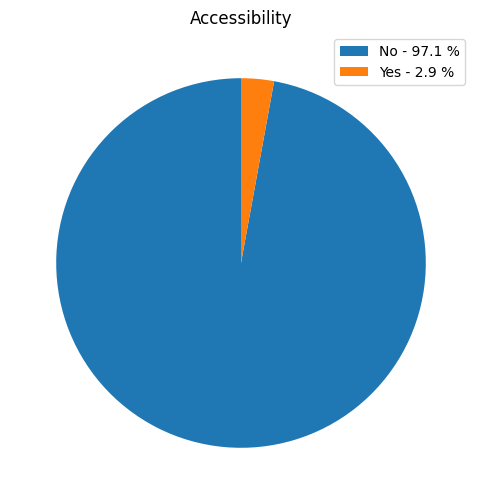

EdLevel
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64


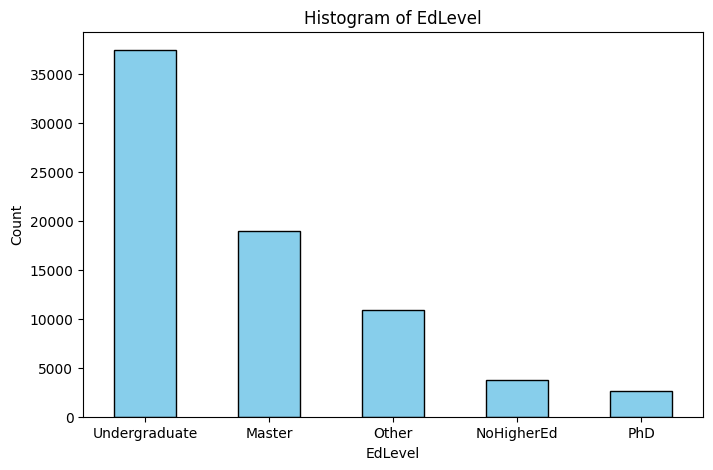

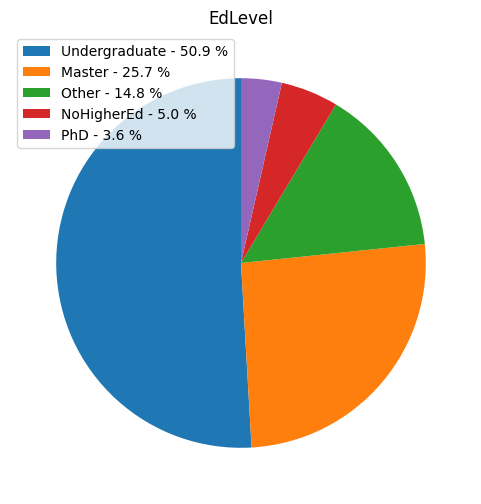

Employment
Employment
1    64874
0     8588
Name: count, dtype: int64


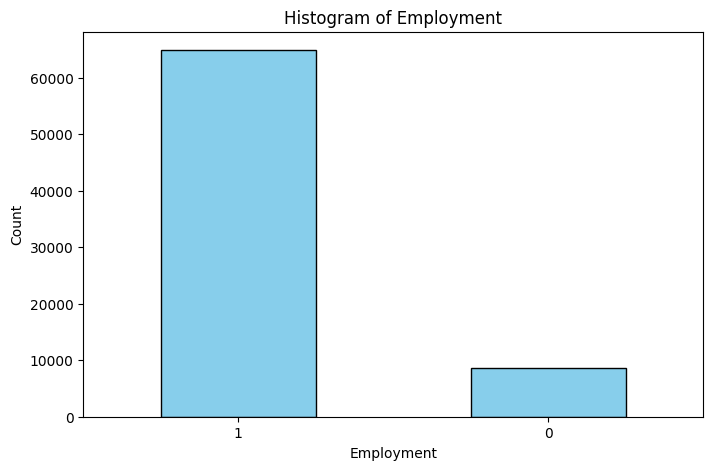

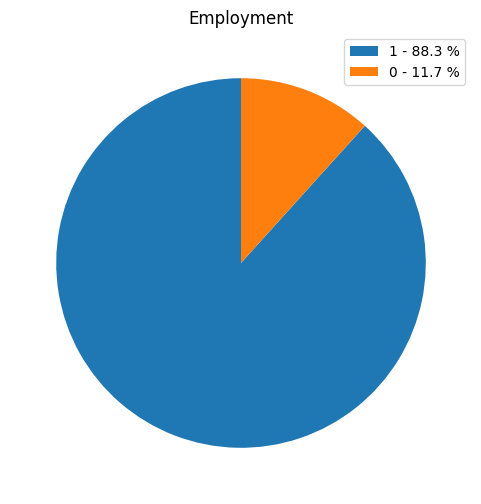

Gender
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


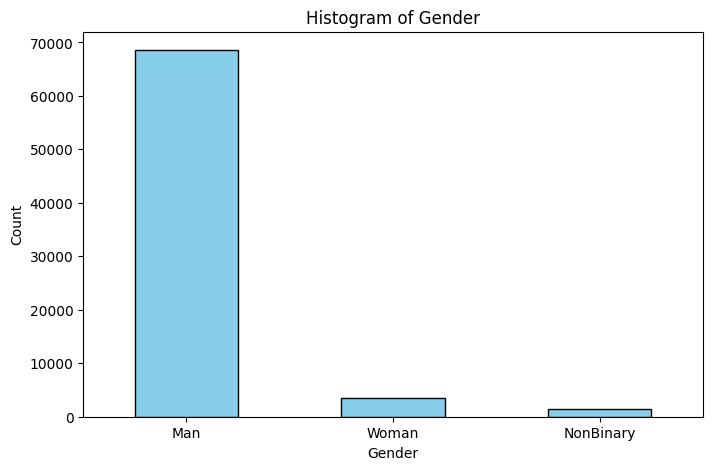

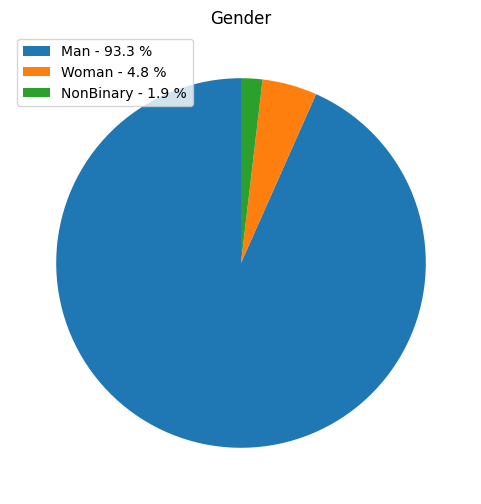

MentalHealth
MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64


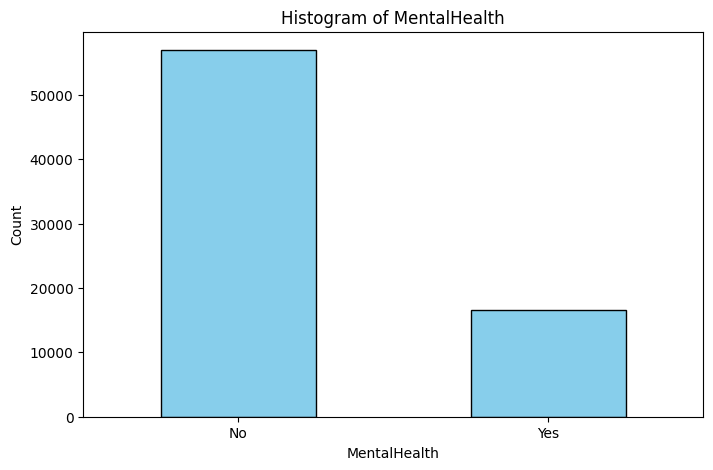

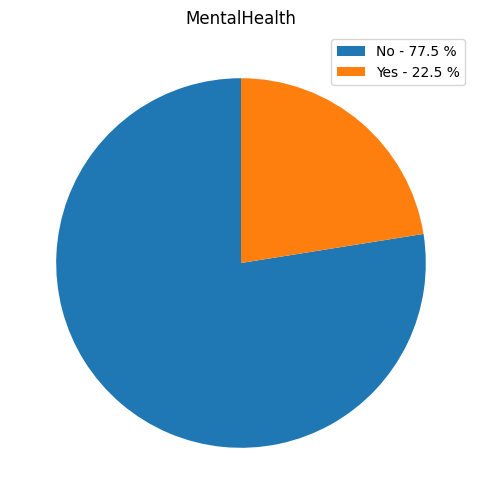

MainBranch
MainBranch
Dev       67396
NotDev     6066
Name: count, dtype: int64


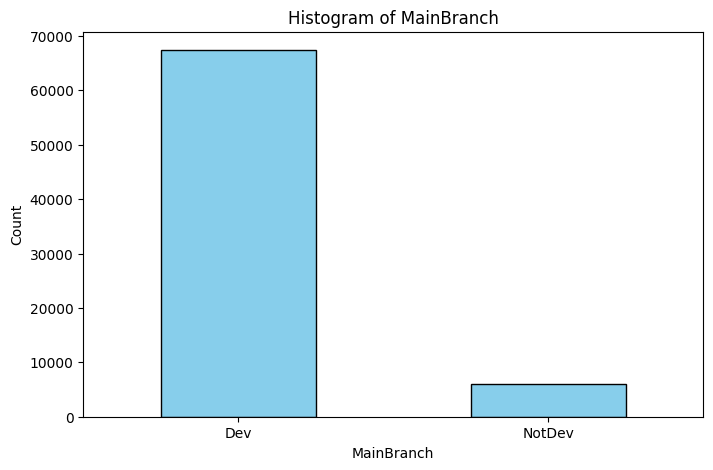

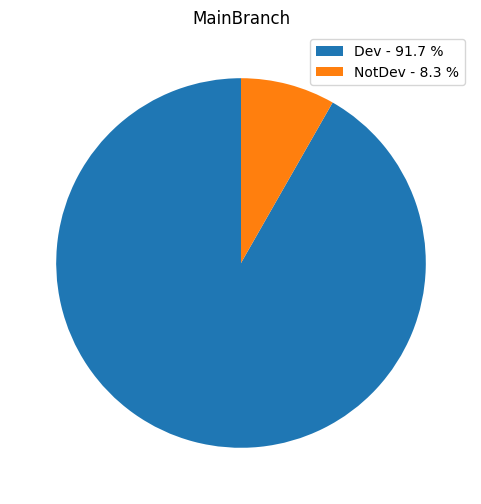

Employed
Employed
1    39392
0    34070
Name: count, dtype: int64


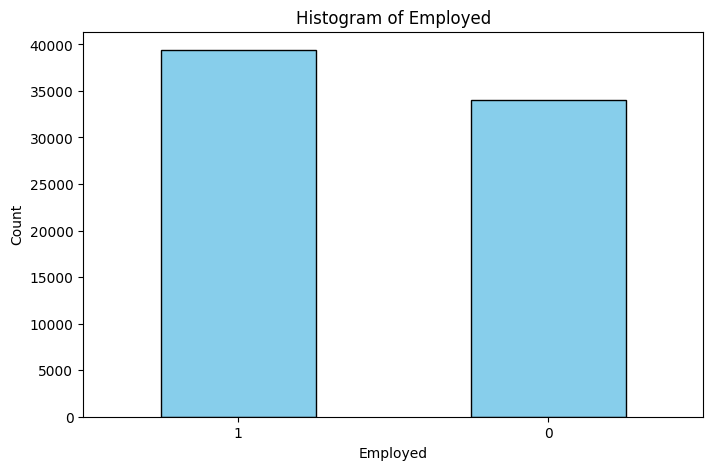

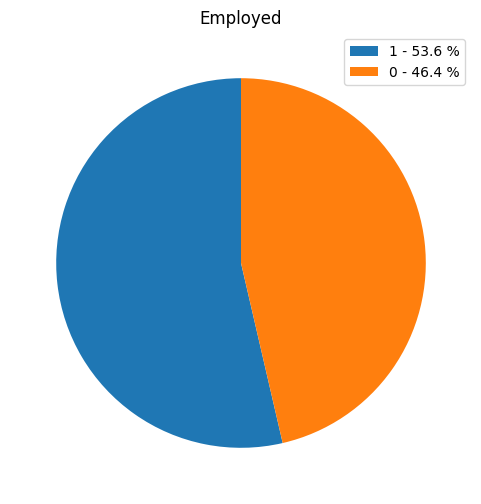

In [93]:
for column_of_interest in ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Employed']:
  print(column_of_interest)

  value_counts = df[column_of_interest].value_counts()
  print(value_counts)

  plt.figure(figsize=(8, 5))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.xlabel(column_of_interest)
  plt.ylabel('Count')
  plt.title(f'Histogram of {column_of_interest}')
  plt.xticks(rotation=0)
  plt.show()

  plt.figure(figsize=(6, 6))
  wedges, texts, autotexts = plt.pie(value_counts, autopct='', startangle=90)

  labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(value_counts.index, 100 * value_counts / value_counts.sum())]
  plt.legend(wedges, labels, loc='best')

  plt.ylabel('')
  plt.title(column_of_interest)
  plt.show()

YearsCode
10    6345
8     4606
7     4500
6     4384
5     4204
15    4142
12    3872
20    3697
9     3116
4     2848
11    2532
14    2375
13    2286
25    2140
3     1949
16    1865
30    1656
18    1646
17    1603
22    1377
2     1134
35     941
23     935
21     868
24     845
19     808
40     791
27     631
26     622
28     514
32     413
1      364
37     350
38     342
33     307
34     294
36     290
29     259
31     216
42     210
39     190
0      187
41     166
45     153
43     124
50     122
44     101
46      57
47      35
48      26
49      24
Name: count, dtype: int64


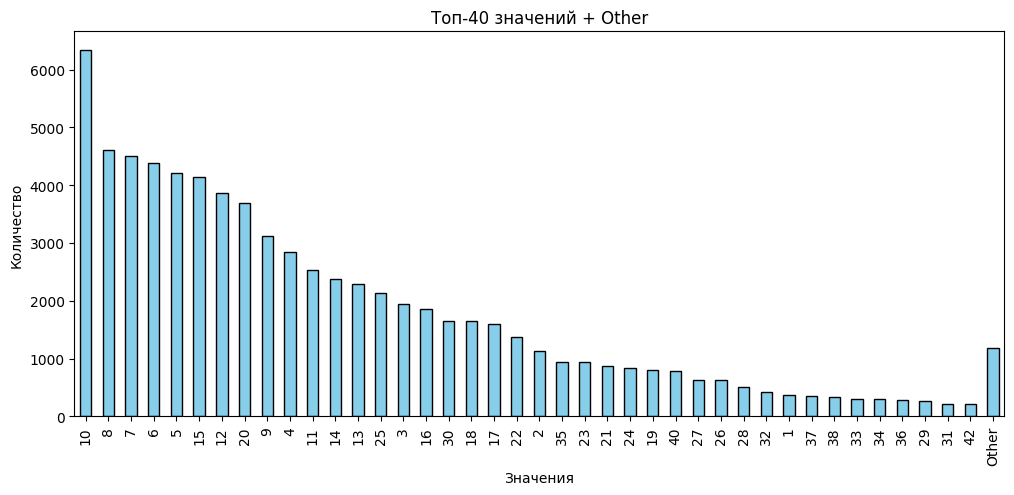

In [94]:
value_counts = df['YearsCode'].value_counts()
print(value_counts)

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

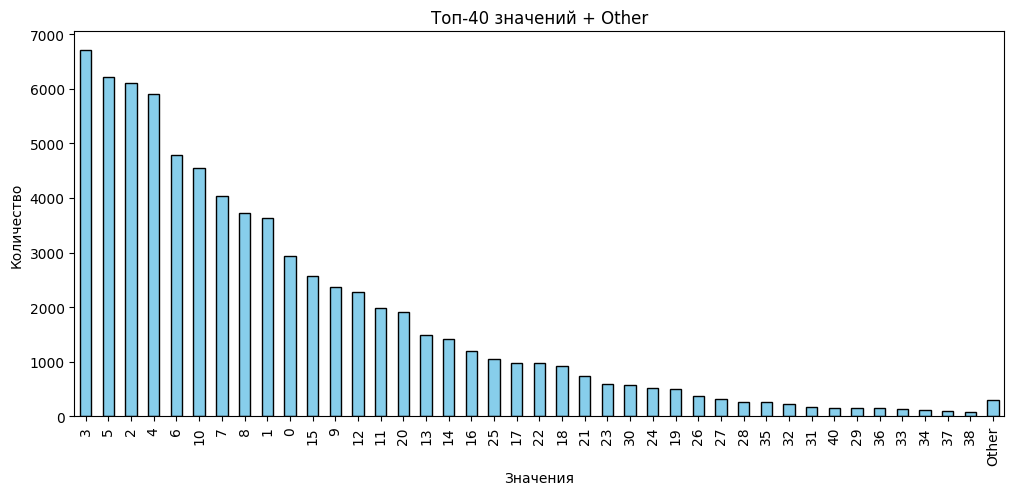

In [95]:
value_counts = df['YearsCodePro'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

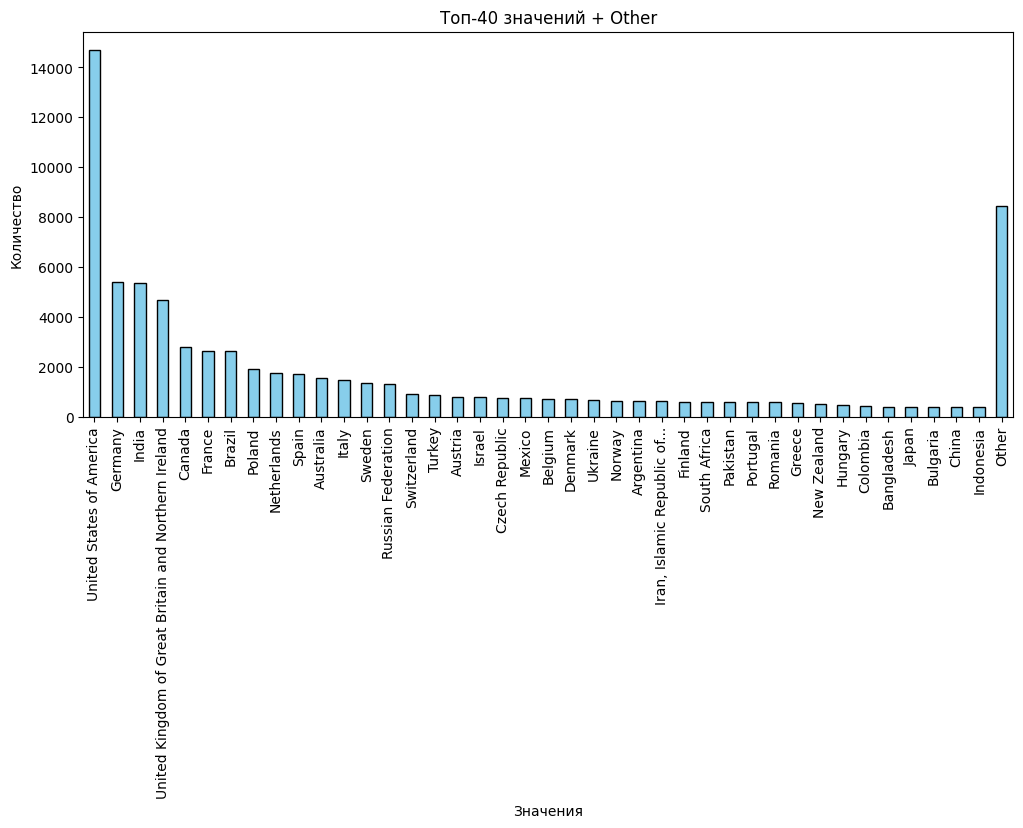

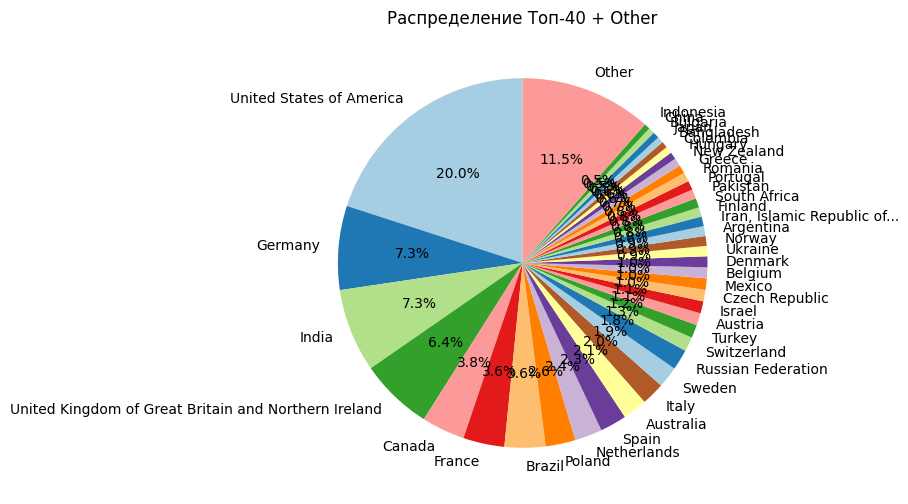

In [96]:
value_counts = df['Country'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
top_values.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

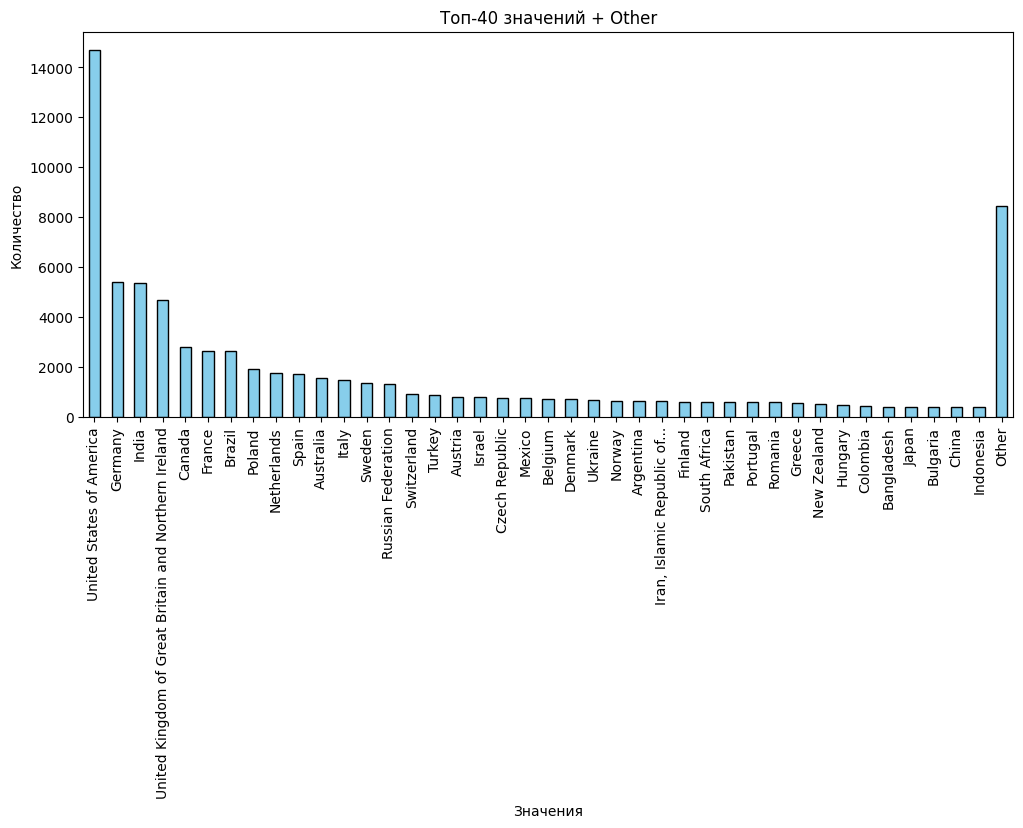

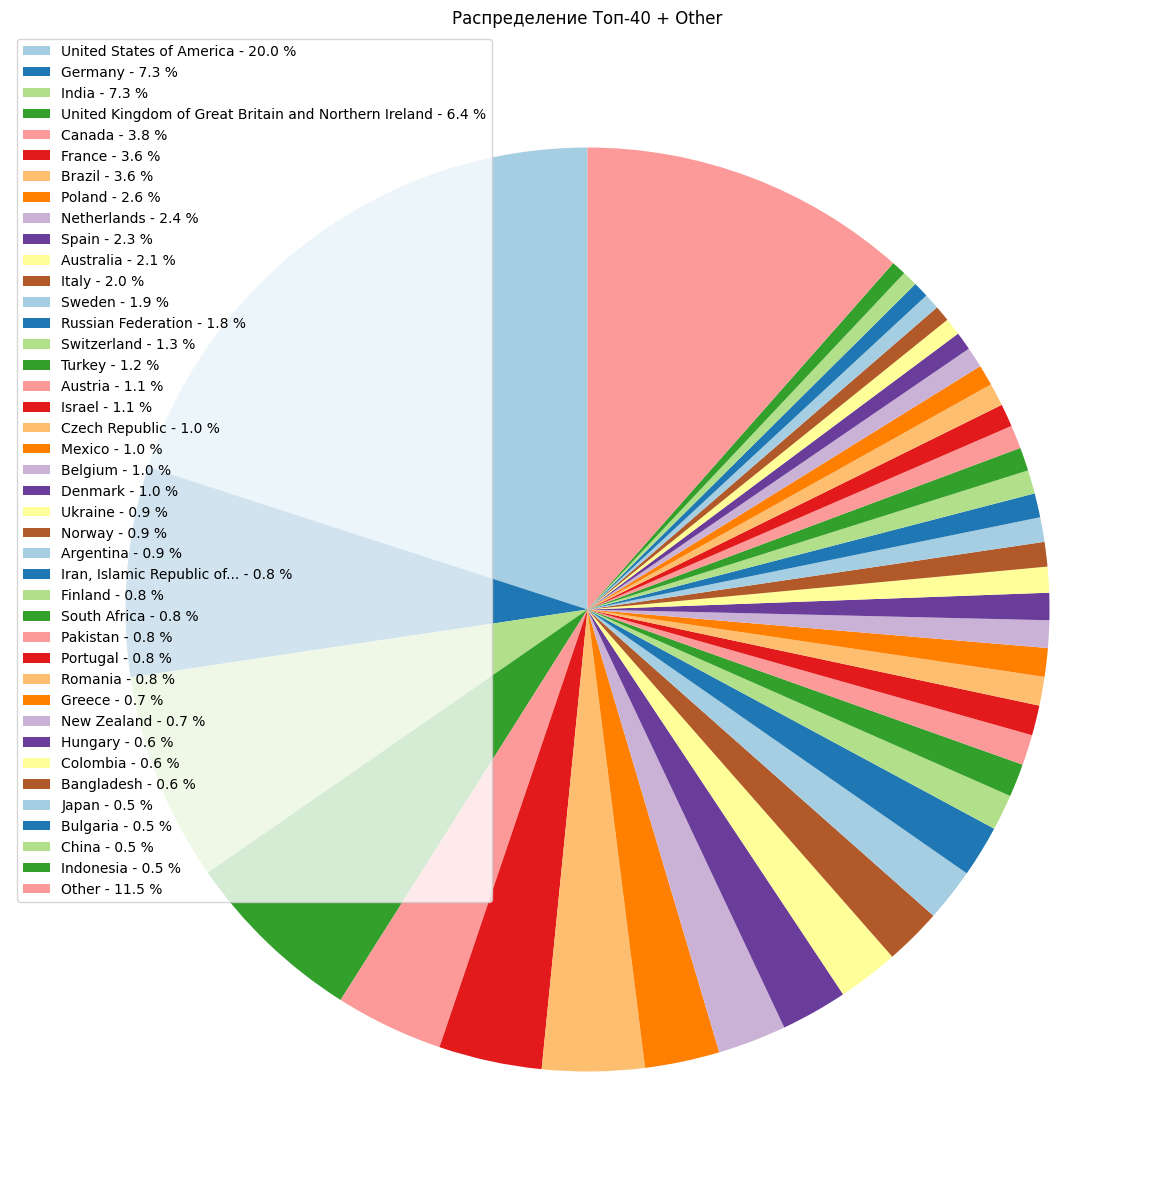

In [97]:
value_counts = df['Country'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie(top_values, autopct='', colors=plt.cm.Paired.colors, startangle=90)

labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(top_values.index, 100 * top_values / top_values.sum())]
plt.legend(wedges, labels, loc='best')

plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

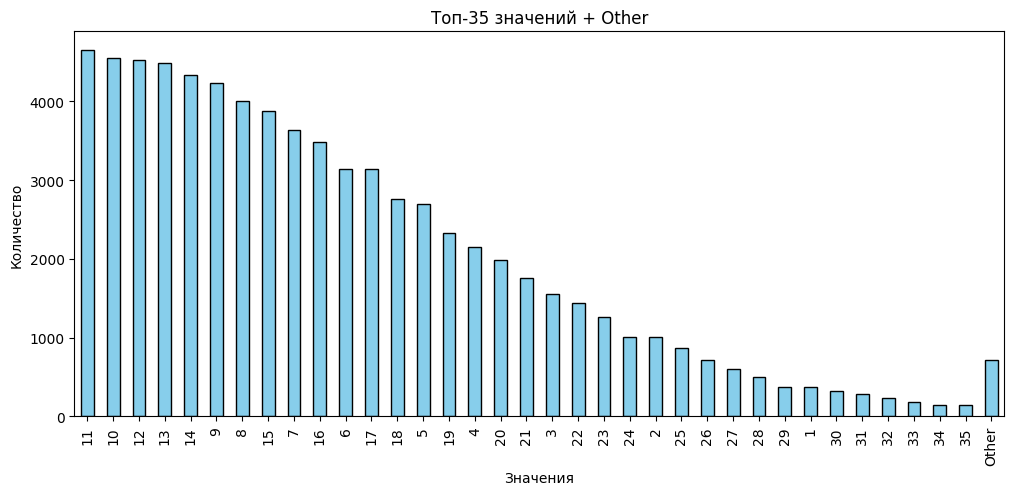

In [98]:
value_counts = df['ComputerSkills'].value_counts()

top_n = 35
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

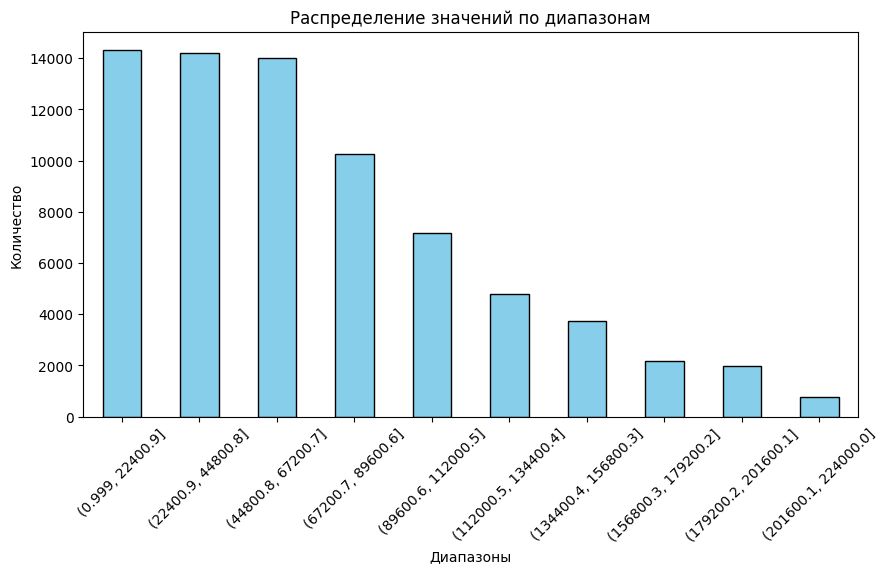

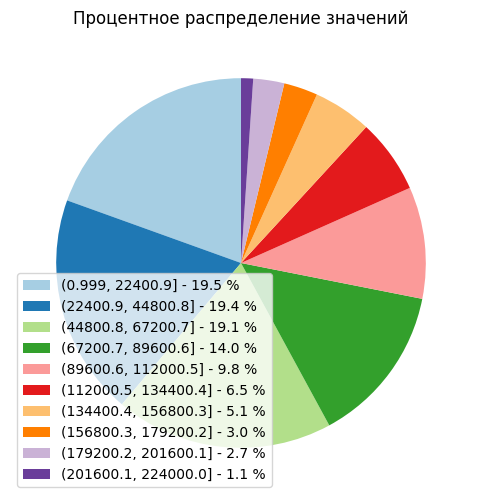

In [99]:
min_val, max_val = df['PreviousSalary'].min(), df['PreviousSalary'].max()
bins = np.linspace(min_val, max_val, 11)  # 10 диапазонов → 11 границ

# Разбиваем значения на интервалы
temp = pd.cut(df['PreviousSalary'], bins=bins, include_lowest=True)

# Подсчитываем количество значений в каждом диапазоне
range_counts = temp.value_counts().sort_index()

# Гистограмма
plt.figure(figsize=(10, 5))
range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Диапазоны')
plt.ylabel('Количество')
plt.title('Распределение значений по диапазонам')
plt.xticks(rotation=45)
plt.show()

# Круговая диаграмма
plt.figure(figsize=(6, 6))
# Create pie chart
wedges, texts, autotexts = plt.pie(range_counts, autopct='', colors=plt.cm.Paired.colors, startangle=90)

# Create legend with percentages
labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(range_counts.index, 100 * range_counts / range_counts.sum())]
plt.legend(wedges, labels, loc='best')  # Add legend with percentage labels

plt.ylabel('')
plt.title('Процентное распределение значений')
plt.show()

HaveWorkedWith
JavaScript                     49347
Docker                         40224
HTML/CSS                       40207
SQL                            38361
Git                            35911
AWS                            31590
Python                         31159
PostgreSQL                     30102
MySQL                          29490
TypeScript                     27533
Node.js                        26043
React.js                       24695
Java                           22653
Bash/Shell                     21929
C#                             21724
Microsoft SQL Server           20105
SQLite                         19324
jQuery                         18812
Microsoft Azure                17963
MongoDB                        17283
npm                            17066
Redis                          16595
PHP                            15409
Yarn                           15303
Kubernetes                     14775
Angular                        14398
Express                

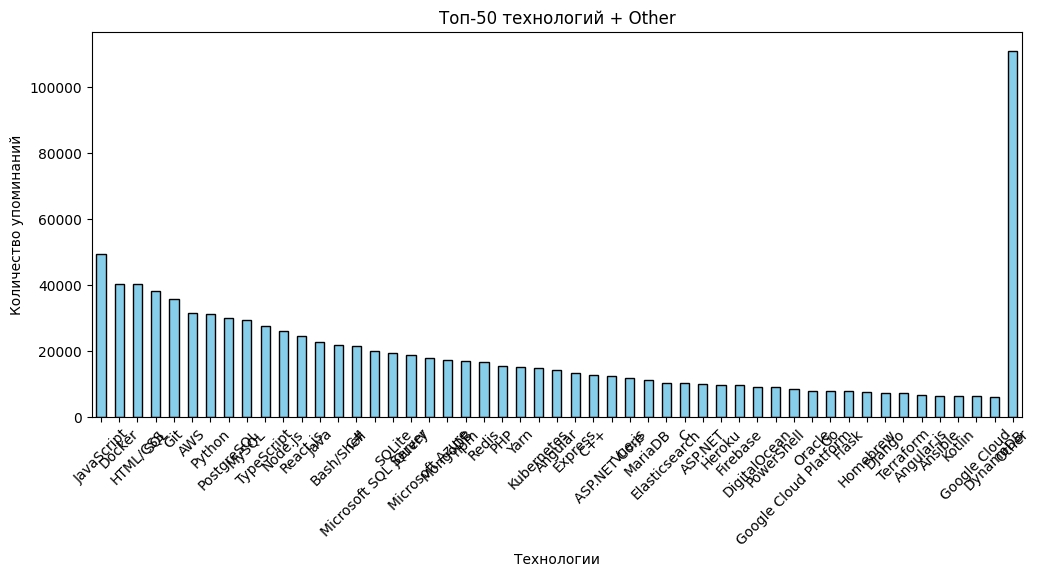

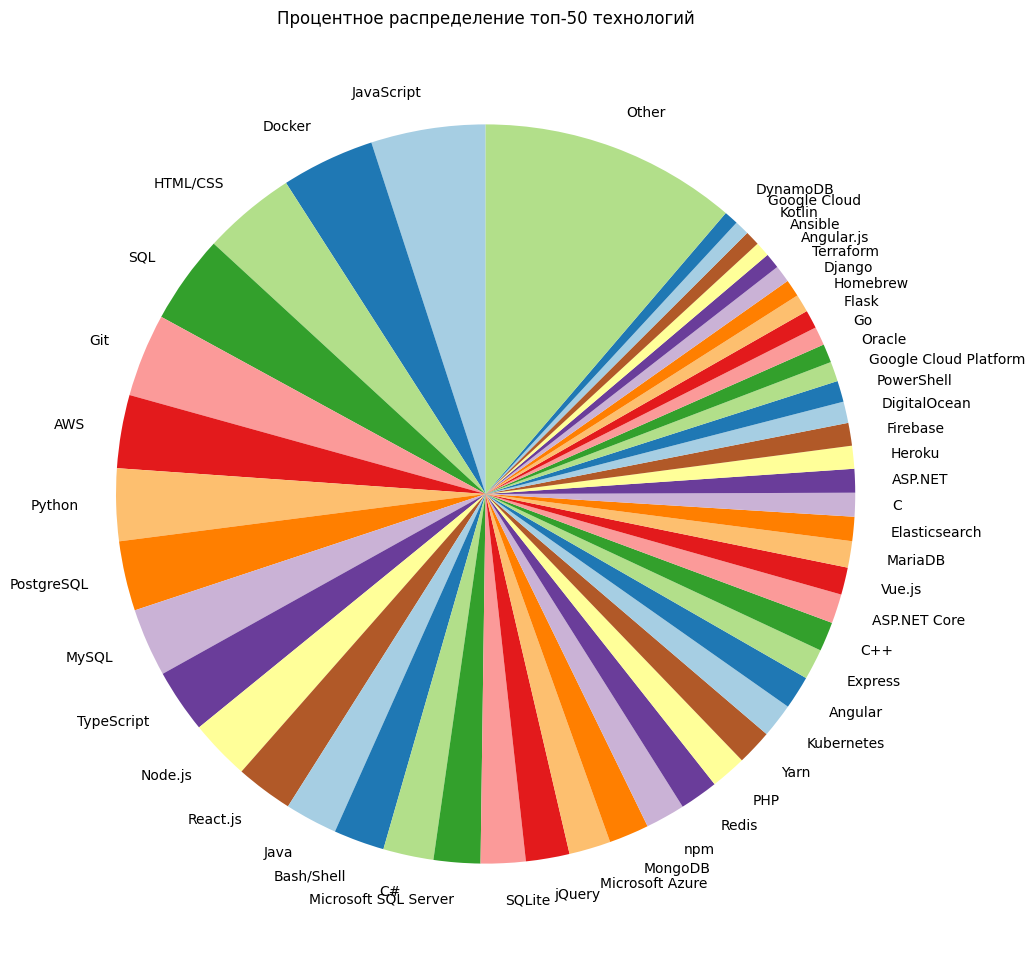

In [100]:
tech_series = df['HaveWorkedWith'].str.split(';').explode()

# Подсчитываем количество вхождений каждой технологии
tech_counts = tech_series.value_counts()
print(tech_counts.to_string())

# Оставляем топ-50, остальные объединяем в "Other"
top_n = 50
top_techs = tech_counts.nlargest(top_n)
other_sum = tech_counts.iloc[top_n:].sum()

if other_sum > 0:
    top_techs = pd.concat([top_techs, pd.Series({'Other': other_sum})])

# Строим гистограмму
plt.figure(figsize=(12, 5))
top_techs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Технологии')
plt.ylabel('Количество упоминаний')
plt.title(f'Топ-{top_n} технологий + Other')
plt.xticks(rotation=45)
plt.show()

# Строим круговую диаграмму
plt.figure(figsize=(12, 12))
top_techs.plot(kind='pie', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Процентное распределение топ-{top_n} технологий')
plt.show()

Проверим есть ли пустые значения

In [101]:
df.isnull()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


Есть 63 пустых значения в колонке "Технологии, с которыми работали"

Посчитаем сколько это будет в процентах от общего количества записей

In [103]:
(100* df.isnull().sum() / len(df))['HaveWorkedWith']

np.float64(0.08575862350603033)

Меньше процента

Посмотрим на эти записи

In [104]:
df[df['HaveWorkedWith'].isnull()]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,1161,>35,No,Undergraduate,1,Man,Yes,Dev,36,32,Switzerland,96566.0,NaN,0,0
2443,2443,>35,No,Other,1,Man,No,Dev,7,6,United States of America,85000.0,NaN,0,0
2533,2533,>35,No,PhD,1,Man,No,NotDev,37,0,Germany,76020.0,NaN,0,0
2657,2657,<35,No,Master,0,Woman,No,Dev,11,5,Portugal,31428.0,NaN,0,0
5797,5797,<35,No,Undergraduate,1,Man,No,Dev,8,4,India,70368.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,69865,<35,No,Other,1,Man,No,Dev,0,0,Colombia,6036.0,NaN,0,0
71795,71795,<35,No,Undergraduate,1,Man,No,Dev,7,3,Bangladesh,5460.0,NaN,0,0
72153,72153,>35,Yes,Other,1,Man,No,NotDev,12,2,Germany,106644.0,NaN,0,0
72588,72588,<35,No,Other,1,Man,Yes,Dev,10,6,Spain,41058.0,NaN,0,0


Вероятно, эти данные или потеряны, или не были заполнены, или заполнены некорректно так как все эти люди не трудоустроены, хотя заявлено, что они программировали профессионально какое-то количество лет. Следовательно, они должны были работать с какими-то технологиями, но в датасете этого нет. Значит, данные ошибочны

Удалим строки с пустыми значениями 'HaveWorkedWith'.

In [105]:
df.dropna(subset=['HaveWorkedWith'], inplace=True)

Проверим остались ли столбцы с пустыми значениями.

In [106]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

Уберем второй (дублирующийся) столбец с индексами

In [107]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Было 73462 строки. Стало 73399

Для образовательных целей удалим 5% случайных значений в колонке ComputerSkills, а потом восстановим их

In [108]:
df_copy = df.copy()

In [109]:
import random

num_rows_to_remove = int(0.05 * len(df_copy))
rows_to_remove = random.sample(range(len(df_copy)), num_rows_to_remove)
df_copy.loc[rows_to_remove, 'ComputerSkills'] = np.nan

KeyError: '[56757, 42838, 55514, 25549] not in index'

In [ ]:
df_copy

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13.0,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11.0,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12.0,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15.0,1


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


In [110]:
df_copy.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [ ]:
def count_skills(skills_str):
  if isinstance(skills_str, str):
    return len(skills_str.split(';'))
  else:
    return 0

df_copy['ComputerSkills'] = df_copy['ComputerSkills'].fillna(df_copy['HaveWorkedWith'].apply(count_skills))

In [ ]:
df_copy.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


In [ ]:
removed_rows_indices = df_copy[df_copy.index.isin(rows_to_remove)].index

original_values = df.loc[removed_rows_indices, 'ComputerSkills']
restored_values = df_copy.loc[removed_rows_indices, 'ComputerSkills']

correct_restorations = (original_values == restored_values).sum()
total_restorations = len(original_values)
accuracy = (correct_restorations / total_restorations) * 100

print(f"Процент правильно восстановленных значений: {accuracy:.2f}%")

Процент правильно восстановленных значений: 100.00%


Теперь будем преобразовывать категориальные столбцы в числовые для дальнейшей работы

Преобразовываем столбец "Age"

In [111]:
df['Age'] = df['Age'].apply(lambda x: 1 if x == '<35' else 0)
df.rename(columns={'Age': 'Age: <35 Years'}, inplace=True)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Accessibility"

In [112]:
df['Accessibility'] = df['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "EdLevel"

In [113]:
education_mapping = {
    'NoHigherEd': 0,
    'Undergraduate': 1,
    'Master': 2,
    'PhD': 3,
    'Other': 4
}
df['EdLevel'] = df['EdLevel'].map(education_mapping)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,2,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,2,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,1,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,3,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,1,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,1,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,1,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Gender"

Для удобства заменим значение 'NonBinary' в столбце 'Gender' на 'Other'

In [114]:
df['Gender'] = df['Gender'].replace('NonBinary', 'Other')

In [115]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MentalHealth"

In [116]:
df['MentalHealth'] = df['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MainBranch"

In [117]:
df['MainBranch'] = df['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,0,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,1,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,1,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,1,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "Country"

In [118]:
threshold = 500 # Определяем порог для "редких" стран
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < threshold].index
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in rare_countries else x)
df = pd.get_dummies(df, columns=['Country'], prefix='Country', dtype=int)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,...,Country_Romania,Country_Russian Federation,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,1,0,2,1,0,1,7,4,51552.0,C++;Python;Git;PostgreSQL,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,...,0,0,0,1,0,0,0,0,0,0
2,1,0,2,1,0,1,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,0,40,30,160932.0,C++;Python,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,...,0,0,0,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,...,0,0,0,0,0,0,0,0,0,1
73459,1,0,1,1,0,1,4,3,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,...,0,0,0,0,0,0,0,0,0,0
73460,1,1,1,1,1,1,5,1,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,...,0,0,0,0,0,0,0,0,0,1


Преобразовываем столбец "HaveWorkedWith"

In [119]:
# Обработка столбца 'HaveWorkedWith'
from collections import defaultdict

tech_counts = defaultdict(int)
for tech_list in df['HaveWorkedWith'].dropna():
    for tech in tech_list.split(';'):
        tech_counts[tech] += 1
threshold_tech = 5000  # Порог для определения редких технологий
def replace_rare_techs(tech_list):
    if pd.isna(tech_list):
        return tech_list
    techs = tech_list.split(';')
    techs = [tech if tech_counts[tech] >= threshold_tech else 'Other' for tech in techs]
    return ';'.join(techs)
df['HaveWorkedWith'] = df['HaveWorkedWith'].apply(replace_rare_techs)
technologies = set(tech for tech, count in tech_counts.items() if count >= threshold_tech)
technologies.add('Other')
tech_data = {f'Tech_{tech}': df['HaveWorkedWith'].apply(lambda x: 1 if tech in str(x) else 0) for tech in technologies}
tech_df = pd.DataFrame(tech_data)
df = pd.concat([df, tech_df], axis=1)
df.drop(columns=['HaveWorkedWith'], inplace=True)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Node.js,Tech_Oracle,Tech_Angular.js,Tech_npm,Tech_Kotlin,Tech_Firebase,Tech_jQuery,Tech_JavaScript,Tech_ASP.NET Core,Tech_Google Cloud
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,12,...,1,0,0,0,0,0,0,1,0,0
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,0,0,0,0,0,0,1,1,0,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,0,0,0,1,0,0,0,1,1,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,1,0,0,0,1,1,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,1,0,0,0,0,1,0,1,0,0
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,0,0,1,0,0,1,1,0,0


Теперь выведем список столбцов, для которых существует высокая корреляция, а также высокая обратная корреляция с другими столбцами  

Корреляция между 'Age: <35 Years' и 'YearsCodePro': -0.6897


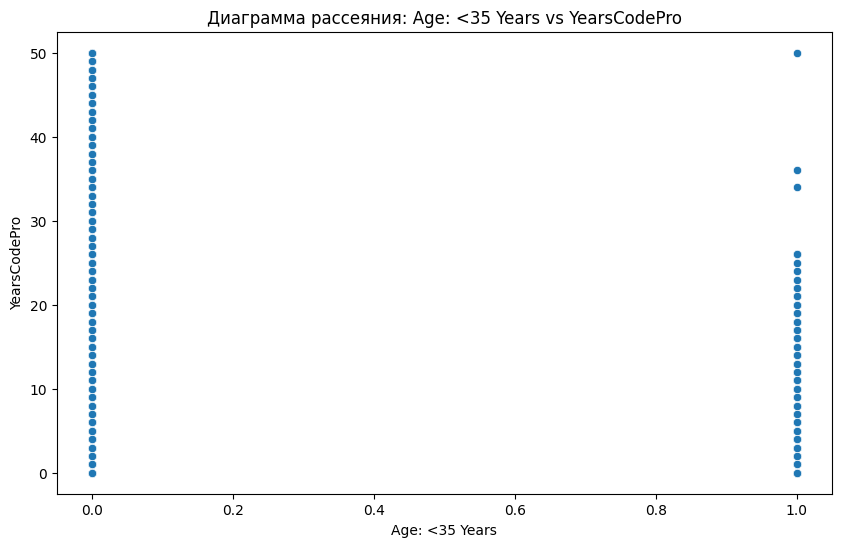


Корреляция между 'Age: <35 Years' и 'YearsCode': -0.6774


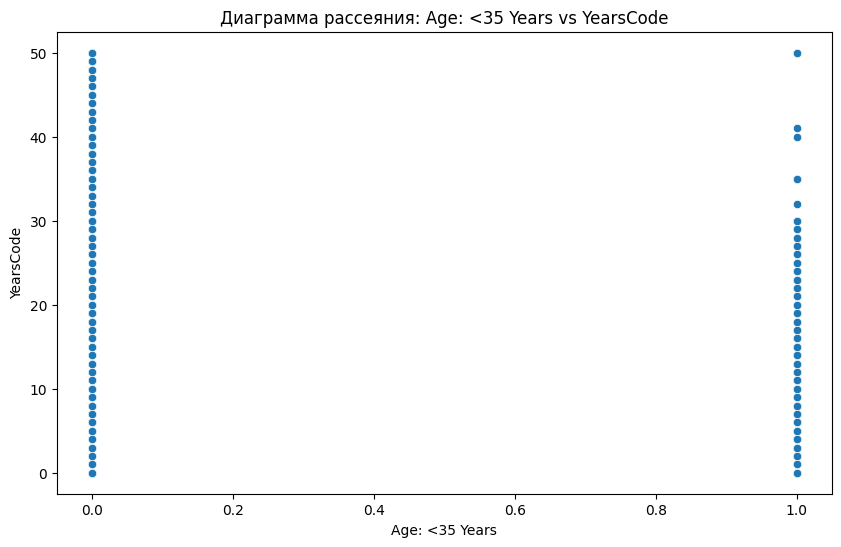


Корреляция между 'YearsCode' и 'YearsCodePro': 0.9012


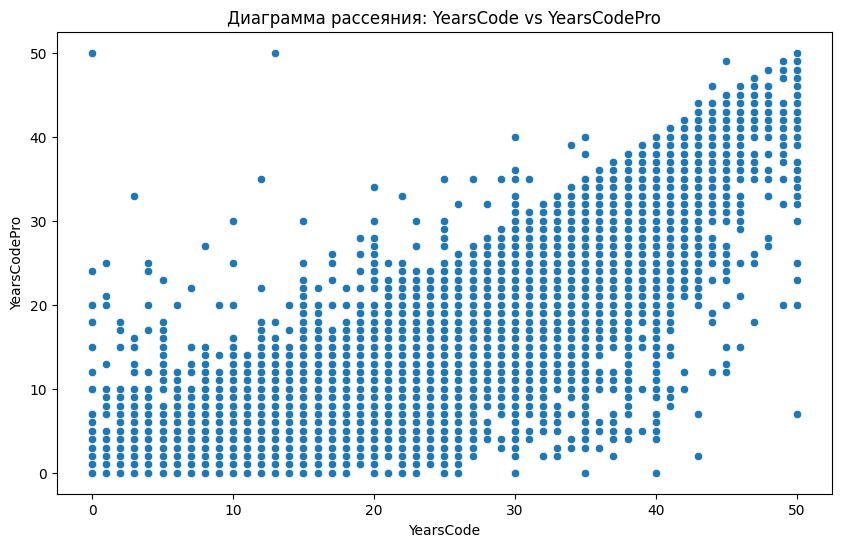


Корреляция между 'PreviousSalary' и 'Country_United States of America': 0.5662


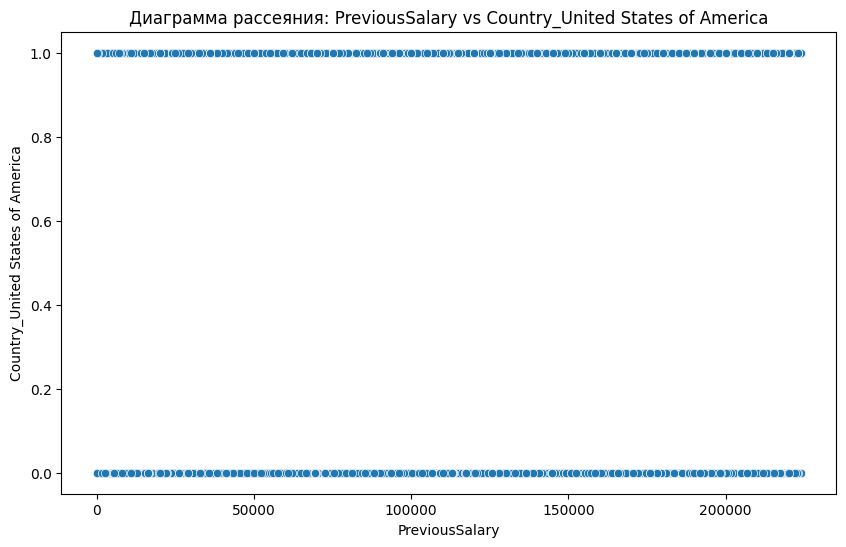


Корреляция между 'ComputerSkills' и 'Employed': 0.5850


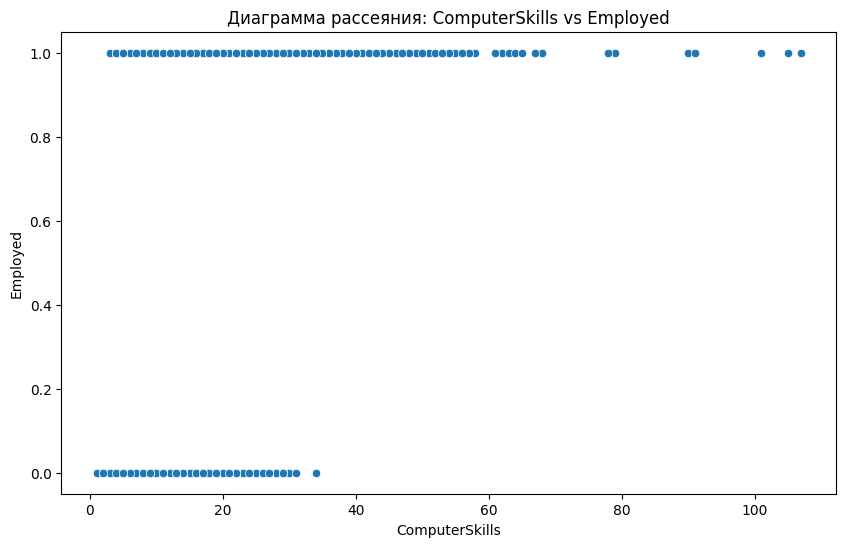

In [120]:
# Фильтруем корреляции, которые больше 0.5 или меньше -0.5
filtr_corr = df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)]

# Устанавливаем значения на главной диагонали в NaN
np.fill_diagonal(filtr_corr.values, np.nan)

# Получаем уникальные названия столбцов, которые имеют хотя бы одну корреляцию
columns_with_high_corr = filtr_corr.columns[filtr_corr.notna().any()]

# Множество для хранения уже выведенных пар
seen_pairs = set()

# Проходим по каждому столбцу и выводим корреляции
for column in columns_with_high_corr:
    correlations = df.corr()[column].loc[lambda x: (x > 0.5) | (x < -0.5)].sort_values().drop(column)

    for correlated_column, value in correlations.items():
        # Создаем упорядоченную пару для избежания дублирования
        pair = tuple(sorted([column, correlated_column]))

        if pair not in seen_pairs:
            # Проверяем, являются ли оба столбца бинарными или булевыми
            if (df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1})) and \
               (df[correlated_column].nunique() == 2 and set(df[correlated_column].unique()).issubset({0, 1})):
                continue  # Пропускаем пары, где оба столбца бинарные/булевые

            seen_pairs.add(pair)
            print(f"Корреляция между '{column}' и '{correlated_column}': {value:.4f}")

            # Создаем диаграмму рассеяния
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[column], y=df[correlated_column])

            # Добавляем заголовок и метки осей
            plt.title(f'Диаграмма рассеяния: {column} vs {correlated_column}')
            plt.xlabel(column)
            plt.ylabel(correlated_column)

            # Отображаем график
            plt.show()
            print()  # Пустая строка для разделения выводов

Из представленных диаграмм рассеивания нам интересны все, кроме 'PreviousSalary' vs 'Country_United States of America'.

Как видно по диаграмме рассеивания 'Age: <35 Years' vs 'YearsCodePro' выбросы наблюдаются

In [121]:
df[(df['Age: <35 Years']==1) & (df['YearsCodePro']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Go,Tech_C#,Tech_Google Cloud,Tech_Python,Tech_Spring,Tech_Ansible,Tech_SQLite,Tech_Oracle,Tech_Laravel,Tech_Express
26491,1,0,1,1,0,1,20,34,47400.0,20,...,0,1,0,1,0,0,0,0,0,1
34790,1,0,1,0,1,1,50,50,9996.0,10,...,0,0,0,1,0,0,1,0,0,0
57970,1,1,2,1,1,1,40,36,158484.0,41,...,1,1,0,1,0,0,0,1,0,0


Как видно из выводы, опрошенным меньше 35 лет, однако они утверждают, что профессионально программируют на протяжении 34+ лет. Чтож, верится с трудом. Разумно будет удалить эти строки.

In [122]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCodePro'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCodePro'>

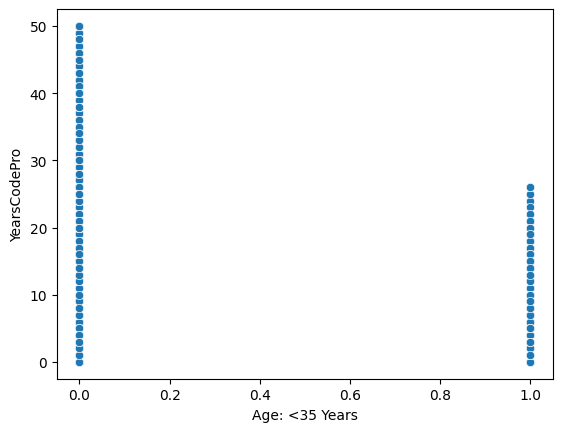

In [123]:
sns.scatterplot(x='Age: <35 Years',y='YearsCodePro',data=df)

Выбросы пропали.

In [124]:
df[(df['Age: <35 Years']==1) & (df['YearsCode']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Go,Tech_C#,Tech_Google Cloud,Tech_Python,Tech_Spring,Tech_Ansible,Tech_SQLite,Tech_Oracle,Tech_Laravel,Tech_Express
1788,1,0,1,1,1,1,32,10,79000.0,8,...,0,1,0,0,0,0,0,0,0,0
19123,1,0,4,1,0,1,35,16,147276.0,18,...,1,0,0,1,1,0,0,0,0,0
52503,1,0,2,1,0,1,50,20,64500.0,4,...,0,0,0,0,0,1,0,0,0,0
58907,1,0,2,1,0,1,35,26,126000.0,17,...,0,1,0,1,0,0,0,0,0,0
62254,1,0,0,1,1,1,41,8,17916.0,1,...,0,0,0,0,0,0,0,0,0,0


Как видим в случае с обычным программированием также есть выбросы, в которых опрашиваемые утверждают, что им меньше 35 лет, но они программируют 32+ года. Верится с трудом. Удалим эти строки.

In [125]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCode'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCode'>

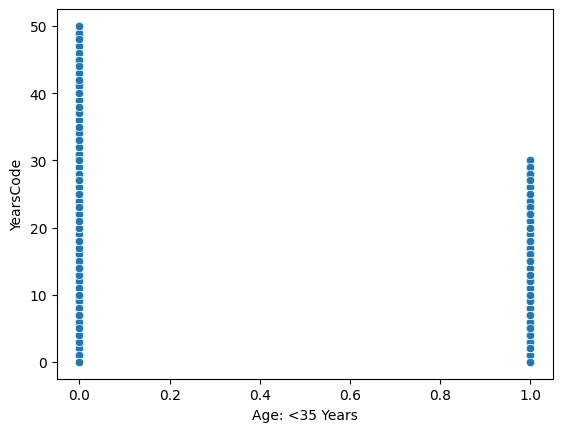

In [126]:
sns.scatterplot(x='Age: <35 Years',y='YearsCode',data=df)

Выбросы пропали.

Далее смотрим диаграмму рассеивания для стобцов YearsCode и YearsCodePro. Видимо что сверху диаграммы есть точки, выглядещие как выбросы. Проведем диагональ от точки 0:10 до точки 40:50 и построим для нее уравнение y = x + 10. Таким образом, для точки (x, y) на диаграмме, чтобы она находилась выше этой диагонали, должно выполняться следующее условие: y >= 0.75x + 20. Снизу диаграммы таккже есть точки, напоминающие выбросы. Проведем диагональ от точки 30:0 до точки 50:25. Диагональ будет иметь уравнение: y = (25/20)(x − 30) или, упрощенно: y = 1.25(x − 30). Таким образом, для точки (x, y) на диаграмме, чтобы она находилась ниже этой диагонали, должно выполняться следующее условие: y <= 1.25(x − 30).

In [127]:
# Удаляем строки, которые соответсвуют заданным диапазонамм
df = df[~((df['YearsCodePro'] >= df['YearsCode'] + 10) |
           (df['YearsCodePro'] <= 1.25 * (df['YearsCode'] - 30)))]

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

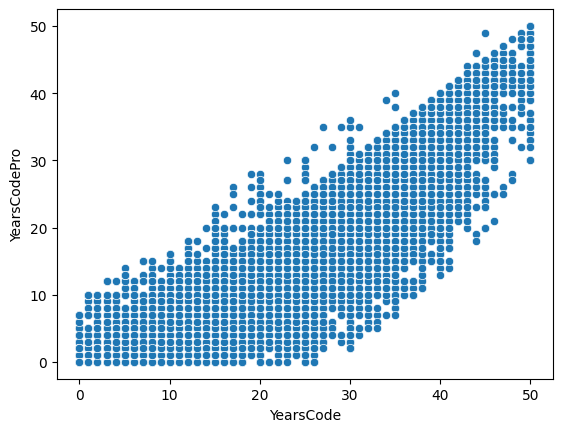

In [128]:
sns.scatterplot(x='YearsCode',y='YearsCodePro',data=df)

Избавились от выбросов.

И последняя диаграмма рассеивания для ComputerSkills и Employed. Тут также видим выбросы. Удалим их.

In [129]:
df = df[~((df['Employed'] == 1) & (df['ComputerSkills'] > 75))]

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

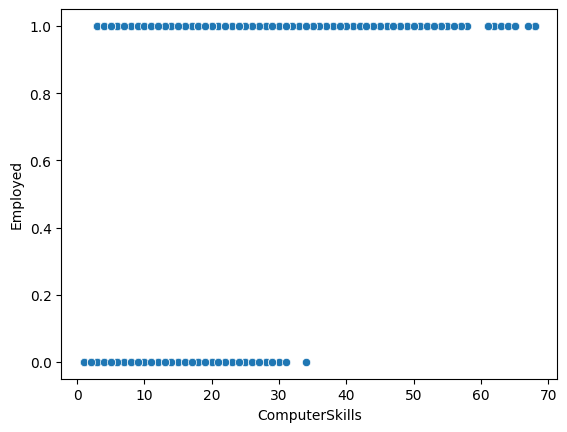

In [130]:
sns.scatterplot(x='ComputerSkills',y='Employed',data=df)

Как видно выбросов стало меньше.

Сохраним обработанный датасет

In [131]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Go,Tech_C#,Tech_Google Cloud,Tech_Python,Tech_Spring,Tech_Ansible,Tech_SQLite,Tech_Oracle,Tech_Laravel,Tech_Express
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,12,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,0,0,0,0,0,0,0,0,1,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,0,1,0,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,1,0,0,0,0,0,0,0,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,0,0,0,0,0,0,0,0,1
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,1,0,0,0,0,1,0,0,0


In [132]:
#df.to_csv('stackoverflow_full_cleaned.csv')

In [ ]:
#files.download('stackoverflow_full_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Предсказание

Будем предсказывать стоблбец "Employed" (Employed: **target** variable, whether the applicant has been hired). Целевой для предсказания столбец. Бинарный

In [ ]:
df['Employed']

,Employed
0,0
1,1
2,0
3,0
4,0
...,...
73457,1
73458,1
73459,1
73460,1


In [ ]:
df['Employed'].unique()

array([0, 1])

In [ ]:
X = df.drop('Employed', axis=1)
y = df['Employed']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**StandardScaler** - это инструмент из библиотеки scikit-learn (sklearn) в Python, который используется для **стандартизации** данных.

Стандартизация - это процесс преобразования данных таким образом, чтобы каждый признак (столбец в вашем датасете) имел **среднее значение 0 и стандартное отклонение 1**.

*StandardScaler* вычисляет среднее значение и стандартное отклонение для каждого признака в ваших тренировочных данных. Затем он использует эти значения, чтобы преобразовать данные по следующей формуле: z = (x - u) / s

где:
- z - стандартизированное значение
- x - исходное значение
- u - среднее значение признака
- s - стандартное отклонение признака

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

*LogisticRegressionCV* - это класс из библиотеки scikit-learn в Python, который используется для построения модели логистической регрессии с **встроенной кросс-валидацией** для оптимизации **гиперпараметра C**.

- **Логистическая регрессия:** это алгоритм машинного обучения, который используется для решения задач **бинарной классификации**, то есть когда нужно разделить данные на две группы (например, "спам" или "не спам").

- **Гиперпараметр C:** это параметр, **который контролирует силу регуляризации** в модели логистической регрессии. Регуляризация помогает предотвратить переобучение модели, то есть когда модель слишком хорошо подстраивается под тренировочные данные и плохо работает на новых данных.

- **Кросс-валидация:** это метод оценки качества модели, который заключается в том, чтобы разделить данные на несколько частей (фолдов), обучать модель на части данных и проверять ее на оставшейся части. Этот процесс повторяется для всех фолдов, и в итоге получается оценка качества модели, которая **менее подвержена случайным факторам.**

1. **C (обратная сила регуляризации)**  
   - **Описание**: Контролирует силу регуляризации. Меньшие значения → сильная регуляризация (меньше переобучения, но меньше точность). Большие значения → слабая регуляризация (лучше подгонка, больше риск переобучения).  
   - **Значение по умолчанию**: `Cs=10` (список из 10 значений C, выбранных в логарифмическом масштабе от 1e-4 до 1e4).  

2. **penalty (тип регуляризации)**  
   - **Описание**: Указывает тип регуляризации. Возможные значения:  
     - 'l1': L1 регуляризация (Lasso)  
     - 'l2': L2 регуляризация (Ridge)  
     - 'elasticnet': комбинация L1 и L2  
     - 'none': без регуляризации  
   - **Значение по умолчанию**: 'l2'  

3. **solver (алгоритм оптимизации)**  
   - **Описание**: Указывает алгоритм оптимизации для нахождения оптимальных параметров модели.
   - **Значение по умолчанию**: 'lbfgs' (алгоритм Бройдена-Флетчера-Гольдфарба-Шанно)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [ ]:
log_model = LogisticRegressionCV()

Считает минуты две. Нужно подождать

In [ ]:
# Считает минуты 2
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [ ]:
log_model.C_

array([2.7825594])

<Axes: xlabel='None'>

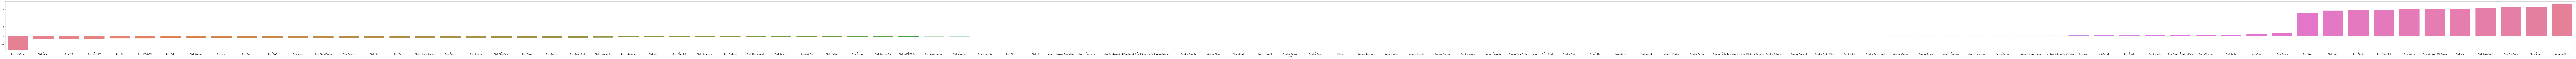

In [ ]:
coef = pd.Series(data=log_model.coef_[0], index=X.columns)
coef = coef.sort_values()
plt.figure(figsize=(250, 5))
sns.barplot(x=coef.index, y=coef.values, hue=coef.index, legend=False)

In [ ]:
log_model.coef_

array([[ 1.49540616e-01,  7.40592061e-03, -2.24614022e-02,
         9.57743725e-03, -5.19335668e-02,  7.79126453e-02,
         2.99796594e-01, -2.92937332e-01,  3.67286242e-02,
         7.39862526e+00,  6.56263197e-03, -5.63217148e-02,
         2.79502048e-02,  3.37333083e-02, -6.96702863e-02,
        -4.97523361e-03,  1.99453213e-02, -3.01462249e-02,
        -5.68257300e-02,  1.88773885e-03, -1.88194341e-02,
         1.20408110e-02,  5.69972346e-03,  6.68578440e-02,
        -3.65916303e-02,  9.11353967e-02,  5.71839715e-02,
        -6.53628845e-02,  2.68635235e-02,  1.12751998e-02,
         1.90595136e-02, -3.61831983e-03, -8.22810764e-03,
        -1.80593122e-02, -1.64149651e-02, -3.68655289e-02,
         2.03663695e-02,  3.35136107e-02, -7.11562968e-02,
         2.23436270e-02,  4.00143478e-02, -1.33973032e-02,
         2.68749200e-02,  3.08843553e-02, -6.94540694e-02,
        -6.94293600e-02,  1.95317738e-02, -3.33490667e-01,
        -3.06845067e-01, -4.90066356e-01, -6.20217190e-0

In [ ]:
for coef in log_model.coef_[0]:
    print(f"{coef: >20.10f}")

        0.1495406162
        0.0074059206
       -0.0224614022
        0.0095774372
       -0.0519335668
        0.0779126453
        0.2997965940
       -0.2929373316
        0.0367286242
        7.3986252631
        0.0065626320
       -0.0563217148
        0.0279502048
        0.0337333083
       -0.0696702863
       -0.0049752336
        0.0199453213
       -0.0301462249
       -0.0568257300
        0.0018877388
       -0.0188194341
        0.0120408110
        0.0056997235
        0.0668578440
       -0.0365916303
        0.0911353967
        0.0571839715
       -0.0653628845
        0.0268635235
        0.0112751998
        0.0190595136
       -0.0036183198
       -0.0082281076
       -0.0180593122
       -0.0164149651
       -0.0368655289
        0.0203663695
        0.0335136107
       -0.0711562968
        0.0223436270
        0.0400143478
       -0.0133973032
        0.0268749200
        0.0308843553
       -0.0694540694
       -0.0694293600
        0.0195317738
       -0.333

Посмотрим на шансы

In [ ]:
np.exp(log_model.coef_[0])

array([1.16130064e+00, 1.00743341e+00, 9.77788977e-01, 1.00962345e+00,
       9.49391936e-01, 1.08102822e+00, 1.34958427e+00, 7.46068894e-01,
       1.03741145e+00, 1.63373693e+03, 1.00658421e+00, 9.45234991e-01,
       1.02834448e+00, 1.03430873e+00, 9.32701294e-01, 9.95037122e-01,
       1.02014556e+00, 9.70303641e-01, 9.44758698e-01, 1.00188952e+00,
       9.81356546e-01, 1.01211359e+00, 1.00571600e+00, 1.06914348e+00,
       9.64069752e-01, 1.09541731e+00, 1.05885059e+00, 9.36727478e-01,
       1.02722760e+00, 1.01133900e+00, 1.01924231e+00, 9.96388218e-01,
       9.91805651e-01, 9.82102780e-01, 9.83719026e-01, 9.63805731e-01,
       1.02057518e+00, 1.03408152e+00, 9.31316319e-01, 1.02259512e+00,
       1.04082571e+00, 9.86692041e-01, 1.02723931e+00, 1.03136622e+00,
       9.32902981e-01, 9.32926033e-01, 1.01972377e+00, 7.16418585e-01,
       7.35764587e-01, 6.12585744e-01, 5.37827614e-01, 8.33736279e-01,
       9.16607131e-01, 3.33666707e+02, 6.28590823e-01, 5.64957618e-01,
      

In [ ]:
for coef in log_model.coef_[0]:
    print(f"{np.exp(coef): >20.10f}")

        1.1613006375
        1.0074334123
        0.9777889770
        1.0096234477
        0.9493919359
        1.0810282216
        1.3495842661
        0.7460688942
        1.0374114543
     1633.7369270434
        1.0065842132
        0.9452349908
        1.0283444765
        1.0343087284
        0.9327012936
        0.9950371224
        1.0201455583
        0.9703036406
        0.9447586981
        1.0018895217
        0.9813565457
        1.0121135934
        1.0057159978
        1.0691434822
        0.9640697518
        1.0954173111
        1.0588505908
        0.9367274778
        1.0272276007
        1.0113390044
        1.0192423056
        0.9963882184
        0.9918056506
        0.9821027800
        0.9837190262
        0.9638057307
        1.0205751792
        1.0340815182
        0.9313163190
        1.0225951154
        1.0408257076
        0.9866920413
        1.0272393077
        1.0313662250
        0.9329029812
        0.9329260330
        1.0197237668
        0.716

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9830693610049154

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3418,   33],
       [  91, 3782]])

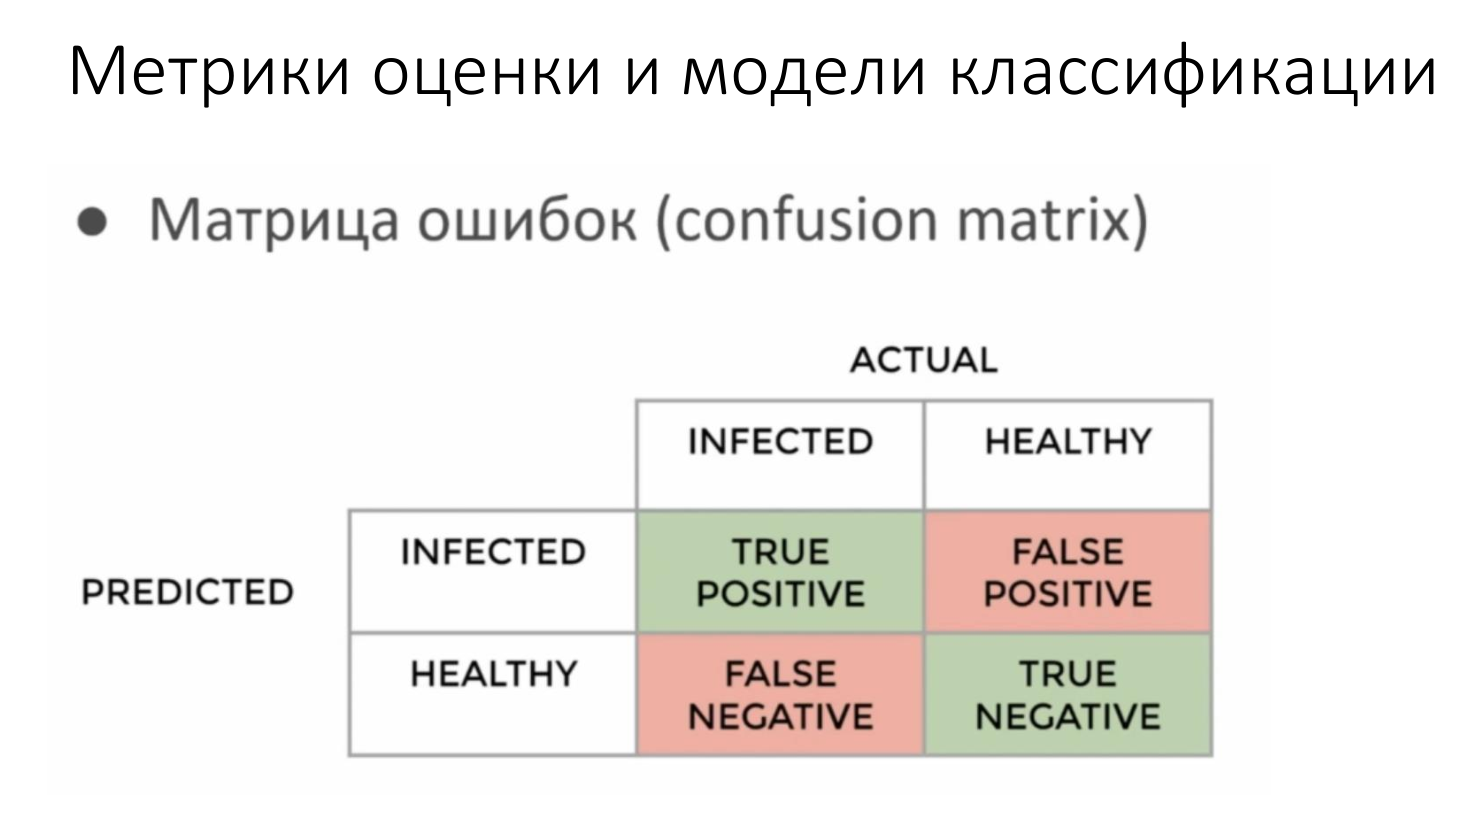

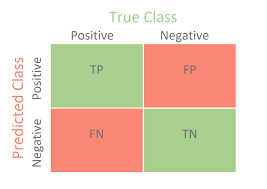

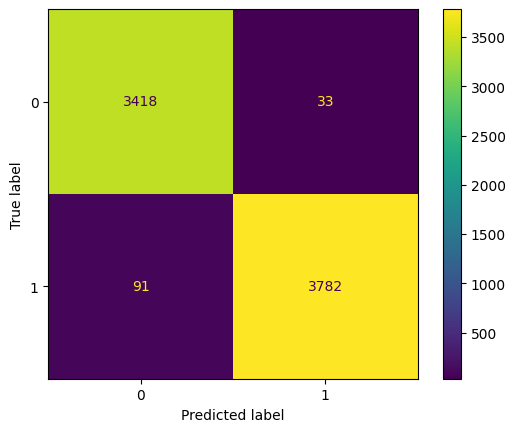

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3451
           1       0.99      0.98      0.98      3873

    accuracy                           0.98      7324
   macro avg       0.98      0.98      0.98      7324
weighted avg       0.98      0.98      0.98      7324



In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

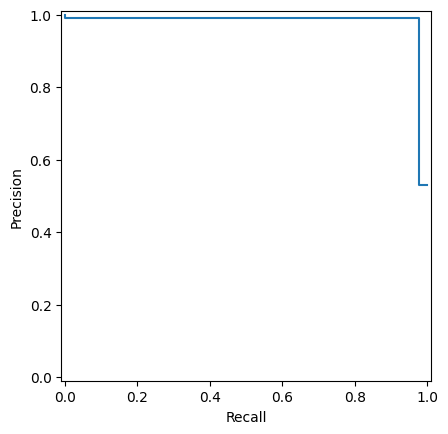

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

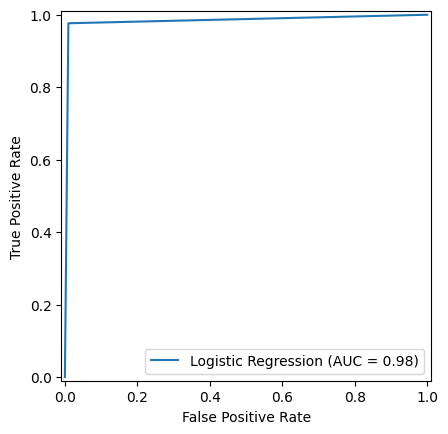

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

Предсказание 2

In [ ]:
df['PreviousSalary']

,PreviousSalary
0,51552.0
1,46482.0
2,77290.0
3,46135.0
4,160932.0
...,...
73457,41058.0
73458,115000.0
73459,57720.0
73460,70000.0


In [ ]:
X = df.drop('PreviousSalary', axis=1)
y = df['PreviousSalary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_model = LinearRegression(fit_intercept=True)

In [ ]:
lin_model.fit(scaled_X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(scaled_X_test)

In [ ]:
np.sqrt(((y_test - y_pred) ** 2).mean())

30251.260643292055

**Восстановление данных в образовательных целях. Продолжение.**

Столбец YearsCodePro. Загрузим подготовленный датасет и сохраним исходные значения YearsCodePro для подсчета accuracy.

In [153]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

# Загружаем подготовленный ранее датасет
df = pd.read_csv('stackoverflow_full_cleaned.csv')

# Сохраняем исходные значения YearsCodePro
original_yearscodepro_values = df['YearsCodePro'].copy()

# Проверяем наличие пустых значений в YearsCodePro
print(f"Количество пустых значений в YearsCodePro до удаления: {df['YearsCodePro'].isnull().sum()}")

Количество пустых значений в YearsCodePro до удаления: 0


Удалим 5% данных и посмотрим корреляцию с другими столбцами для YearsCodePro.

In [154]:
# Удаление 5% данных из YearsCodePro
num_rows_to_remove_yearscodepro = int(0.05 * len(df))
removed_rows_indices_yearscodepro = random.sample(range(len(df)), num_rows_to_remove_yearscodepro)
df.loc[removed_rows_indices_yearscodepro, 'YearsCodePro'] = np.nan

# Проверяем наличие пустых значений после удаления
print(f"Количество пустых значений в YearsCodePro после удаления: {df['YearsCodePro'].isnull().sum()}")

# Нахождение корреляции
corr_matrix = df.corr()
yearscodepro_corr = corr_matrix['YearsCodePro'].sort_values(ascending=False)
print(yearscodepro_corr) # Выводим отсортированные корреляции

Количество пустых значений в YearsCodePro после удаления: 3661
YearsCodePro                        1.000000
YearsCode                           0.908263
PreviousSalary                      0.396229
Tech_Microsoft SQL Server           0.130561
Country_United States of America    0.124156
                                      ...   
Country_Other                      -0.112854
Tech_Heroku                        -0.113508
Tech_React.js                      -0.116737
Country_India                      -0.137376
Age: <35 Years                     -0.691944
Name: YearsCodePro, Length: 103, dtype: float64


Видим. что корреляция наиболее высокая с YearsCode. Теперь начнем процесс восстановления пустых значений с использованием регрессии.

In [155]:
# Разделение данных
df_train = df[df['YearsCodePro'].notnull()]
df_pred = df[df['YearsCodePro'].isnull()]

# Обучение модели
X_train = df_train[['YearsCode']]
y_train = df_train['YearsCodePro']
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений
X_pred = df_pred[['YearsCode']]
y_pred = model.predict(X_pred)

# Замена пропусков
df.loc[df['YearsCodePro'].isnull(), 'YearsCodePro'] = y_pred

Вычисление accuracy (процента правильно восстановленных значений).

In [156]:
# Получаем исходные и восстановленные значения
original_values_yearscodepro = original_yearscodepro_values[removed_rows_indices_yearscodepro].astype(float)
restored_values_yearscodepro = df.loc[removed_rows_indices_yearscodepro, 'YearsCodePro'].astype(float)

# Проверяем несколько примеров
print("Примеры исходных и восстановленных значений:")
for orig, pred in zip(original_values_yearscodepro[:5], restored_values_yearscodepro[:5]):
    print(f"Исходное: {orig}, Восстановленное: {pred}")

# Сравниваем с допуском ±1
comparison_result = np.isclose(original_values_yearscodepro, restored_values_yearscodepro, rtol=0, atol=1)

# Считаем метрики
correct_restorations_yearscodepro = comparison_result.sum()
total_restorations_yearscodepro = len(original_values_yearscodepro)
accuracy_yearscodepro = (correct_restorations_yearscodepro / total_restorations_yearscodepro) * 100

# Средняя абсолютная ошибка
mae = np.mean(np.abs(original_values_yearscodepro - restored_values_yearscodepro))

# Выводим результаты
print(f"Процент правильно восстановленных значений YearsCodePro (с допуском ±1): {accuracy_yearscodepro:.2f}%")
print(f"Корректные восстановления: {correct_restorations_yearscodepro}")
print(f"Общее количество восстановлений: {total_restorations_yearscodepro}")
print(f"Средняя абсолютная ошибка: {mae:.2f}")

Примеры исходных и восстановленных значений:
Исходное: 5.0, Восстановленное: 5.856075360722904
Исходное: 1.0, Восстановленное: -0.3106797425437693
Исходное: 8.0, Восстановленное: 7.397764136539571
Исходное: 5.0, Восстановленное: 5.0852309728145695
Исходное: 4.0, Восстановленное: 1.231009033272899
Процент правильно восстановленных значений YearsCodePro (с допуском ±1): 30.62%
Корректные восстановления: 1121
Общее количество восстановлений: 3661
Средняя абсолютная ошибка: 2.39


Проведенное восстановление данных для столбца YearsCodePro можно считать не эффективным. Низкая accuracy (около 30%) свидетельствует о том, что модель регрессии, построенная на основе корреляции между YearsCodePro и YearsCode, не смогла успешно восстановить пропущенные значения :(